# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [83]:
# Your code here - load the dataset
import pandas as pd 
ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [84]:
# Your code here
ames.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [85]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis=1).copy()
ames

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

<Axes: xlabel='LotArea', ylabel='SalePrice'>

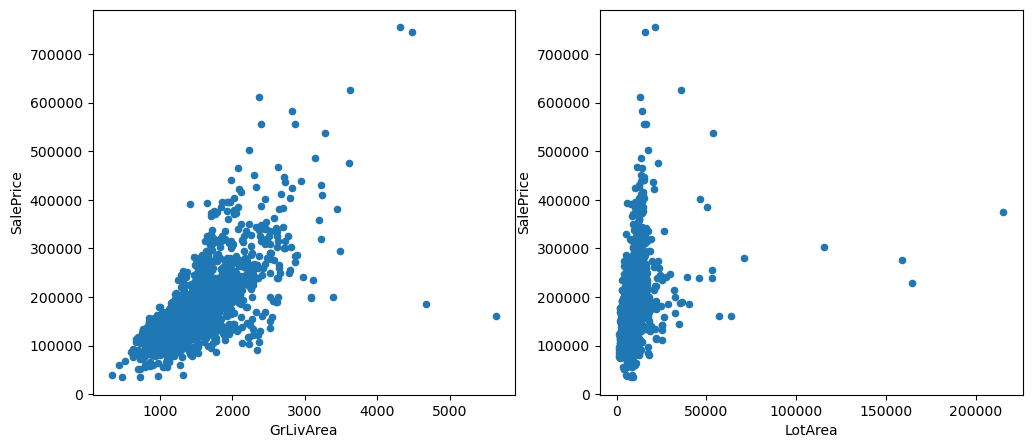

In [86]:
# Your code here - continuous numeric predictor
# Importing necessary libraries
import matplotlib.pyplot as plt

# From the data description and previous plots, I chose 
# GrLivArea since it has a more linear relationship with SalePrice than LotArea
# GrLivArea: Above grade (ground) living area square feet
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ames.plot(kind="scatter", y="SalePrice", x="GrLivArea", ax=ax[0])
ames.plot(kind="scatter", y="SalePrice", x="LotArea", ax=ax[1])

### Discrete Numeric Predictor

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

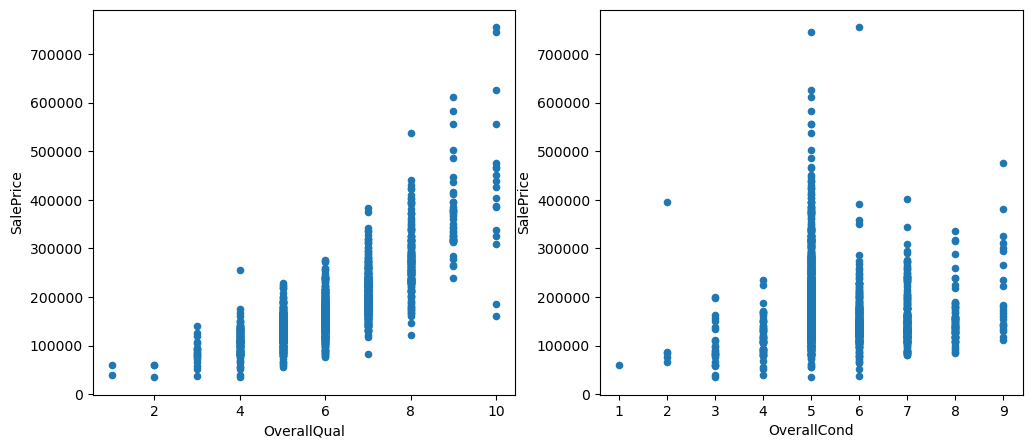

In [87]:
# Your code here - discrete numeric predictor
# Choosing between OverallQual and OverallCond to determine which has a more linear relationship
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ames.plot(kind="scatter", y="SalePrice", x="OverallQual",ax=ax[0])
ames.plot(kind="scatter", y="SalePrice", x="OverallCond",ax=ax[1])

# OverallQual seems to have a more linear relationship hence I will select it as my predictor

### String Categorical Predictor

<Axes: xlabel='LandContour'>

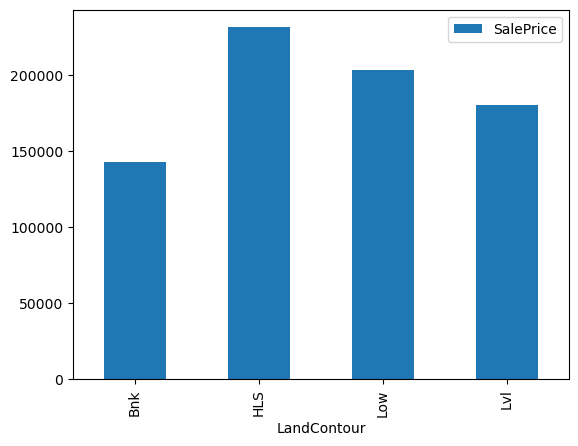

In [88]:
# Your code here - string categorical predictor
ames.groupby("LandContour").mean("SalePrice").plot.bar(y="SalePrice")
# LandContour: Flatness of the property
# This seems like a good predictor since it is a string category

### Discrete Categorical Predictor

<Axes: xlabel='MSSubClass'>

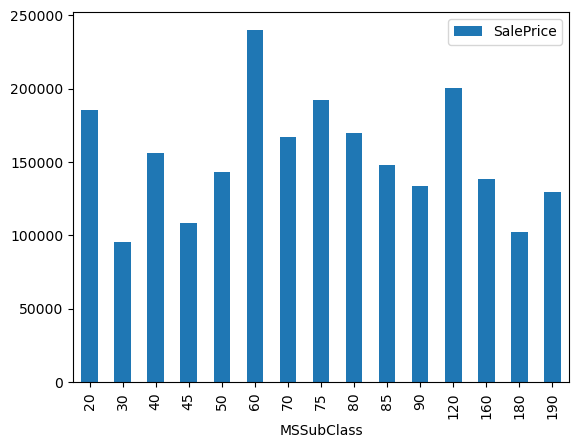

In [89]:
# Your code here - discrete categorical predictor
# MSSubClass: Identifies the type of dwelling involved in the sale.
# This column has numbers as code for another meaning
ames.groupby("MSSubClass").mean("SalePrice").plot.bar(y="SalePrice")

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [90]:
# Your code here - prepare X and y, including one-hot encoding
y = ames[["SalePrice"]]
X = ames[["GrLivArea","LandContour","OverallQual"]]

In [91]:
# Your answer here - which category or categories were dropped?

#The 'MSSubClass' category was dropped. It seems awfully complicated. 

#OneHotEncoding
X = pd.get_dummies(X, columns=["LandContour"], drop_first=True, dtype=int)
X

,GrLivArea,OverallQual,LandContour_HLS,LandContour_Low,LandContour_Lvl
Id,,,,,
1,1710,7,0,0,1
2,1262,6,0,0,1
3,1786,7,0,0,1
4,1717,7,0,0,1
5,2198,8,0,0,1
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,0,1


In [92]:
# Remember:
# LandContour_Bnk:	Banked - Quick and significant rise from street grade to building

In [93]:
# Your code here - build a regression model and display results

import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     771.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:36:18   Log-Likelihood:                -17599.
No. Observations:                1460   AIC:                         3.521e+04
Df Residuals:                    1454   BIC:                         3.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.295e+05   6928.319    -

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

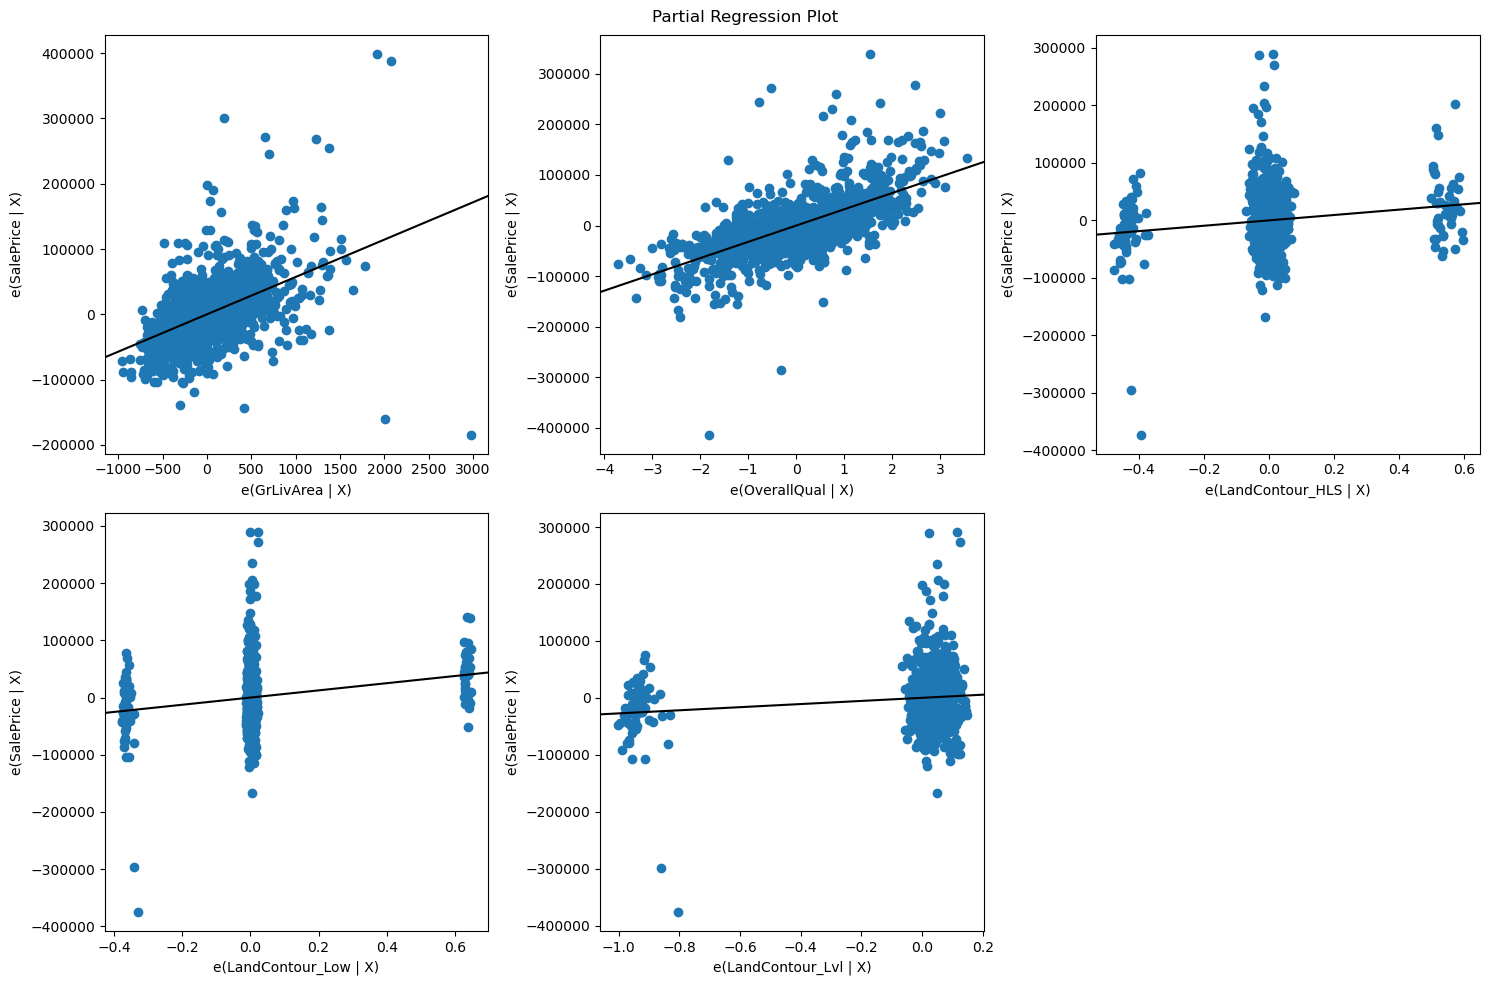

In [94]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [95]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error
y_pred = results.predict(sm.add_constant(X))

print(mean_absolute_error(y,y_pred))


28268.758644209855


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [96]:
# Your answer here
# import the necesarry libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [97]:
X_sklearn = ames[["GrLivArea", "OverallQual", "LotShape"]].copy()
X_cat = X_sklearn[["LotShape"]]
X_numeric = X_sklearn.drop("LotShape", axis=1)

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(X_cat)
X_cat_ohe = pd.DataFrame(
    data=ohe.transform(X_cat),
    columns=[f"LotShape_{cat}" for cat in ohe.categories_[0][1:]],
    index=X_cat.index
)
X_cat_ohe

,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
...,...,...,...
1456,0.0,0.0,1.0
1457,0.0,0.0,1.0
1458,0.0,0.0,1.0


In [98]:
X_sklearn_final = pd.concat([X_numeric, X_cat_ohe], axis=1)
X_sklearn_final

,GrLivArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,1710,7,0.0,0.0,1.0
2,1262,6,0.0,0.0,1.0
3,1786,7,0.0,0.0,0.0
4,1717,7,0.0,0.0,0.0
5,2198,8,0.0,0.0,0.0
...,...,...,...,...,...
1456,1647,6,0.0,0.0,1.0
1457,2073,6,0.0,0.0,1.0
1458,2340,7,0.0,0.0,1.0


In [99]:
lr = LinearRegression()
lr.fit(X_sklearn_final, y)

LinearRegression()

In [100]:
import numpy as np
print(results.params.values)
print(np.append(lr.intercept_, lr.coef_))

[-1.29463791e+05  5.71965457e+01  3.21333465e+04  4.67709345e+04
  6.28471178e+04  2.73545583e+04]
[-8.91984448e+04  5.45636496e+01  3.21262730e+04  1.40668251e+04
 -2.84021192e+04 -1.37608433e+04]


In [101]:
mean_absolute_error(y, lr.predict(X_sklearn_final))

28396.05079899291

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [102]:
# Your code here

"""
Our model is statistically significant overall, and explains about 72% of the
variance in SalePrice. On average it is off by about $28k in its predictions
of home price.

All of our coefficients are statistically significant

So we can say that:

const: When above-grade living area is 0, overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of -$89k
       
GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
           associated increase of about $55 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $32k in sale price

LotShape_IR2: Compared to a slightly irregular lot shape, we see an associated
              increase of about $14k for a moderately irregular lot shape

LotShape_IR3: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $28k for an irregular lot shape

LotShape_Reg: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $14k for a regular lot shape

Looking at the partial regression plots, the dummy variables look fairly
different from the other variables. They tend to have two clusters rather than
a continuous "cloud". Given the relatively small numbers in IR2 and IR3, I
wonder if a better model would have these binned together with IR1 instead.
"""

'\nOur model is statistically significant overall, and explains about 72% of the\nvariance in SalePrice. On average it is off by about $28k in its predictions\nof home price.\n\nAll of our coefficients are statistically significant\n\nSo we can say that:\n\nconst: When above-grade living area is 0, overall quality is 0, and lot shape\n       is slightly irregular, we would expect a home sale price of -$89k\n       \nGrLivArea: For each increase of 1 sqft in above-grade living area, we see an\n           associated increase of about $55 in sale price\n\nOverallQual: For each increase of 1 in overall quality, we see an associated\n             increase of about $32k in sale price\n\nLotShape_IR2: Compared to a slightly irregular lot shape, we see an associated\n              increase of about $14k for a moderately irregular lot shape\n\nLotShape_IR3: Compared to a slightly irregular lot shape, we see an associated\n              decrease of about $28k for an irregular lot shape\n\nLotSha

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.